# 第2章  k-近邻算法

## 本章内容

* k-近邻分类算法
* 从文本中解析和导入数据
* 使用Matplotlib创建扩散图
* 归一化数值

## 2.1 k-近邻算法概述

**k-近邻算法**：（kNN, k-NearestNeighbor）是采用测量不同特征值之前的距离的方法来进行分类。

**工作原理**：

1. 存在一个样本数据集，也称作训练样本集，并且样本集中每个数据都存在标签，即已经知道样本集中每一数据与所属分类的对应关系；
2. 输入新的无标签的数据后，将新数据的每个特征与样本集中数据对应的特征进行比较；
    * 计算新数据与样本数据集中每条数据的距离
    * 对求得的所有距离进行排序（从小到大，越小表示越相似）
    * 取前 k （k 一般小于等于 20 ）个样本数据对应的分类标签
3. 求 k 个数据中出现次数最多的分类标签作为新数据的分类。


**开发流程**：

1. 收集数据：任何方法
2. 准备数据：距离计算所需要的数值，最好是结构化的数据格式
3. 分析数据：任何方法
4. ~~训练算法：此步骤不适用于 k-近邻算法~~
5. 测试算法：计算错误率
6. 使用算法：首先需要输入样本数据和结构化输出结果，然后运行k-近邻算法判定输入数据分贝属于哪个分类，最后应用对计算出的分类执行后续的处理。

**算法特点**：

* 优点：精度高、对异常值不敏感、无数据输入假定。
* 缺点：计算复杂度高、空间复杂度高
* 使用数据范围：数值型和标称型。


## 2.2 k-近邻算法的使用场景

> 这里通过一个例子进行讲解。

电影可以按照题材进行分类，那么如何区分`动作片`和`爱情片`呢？首先我们知道，`动作片`中肯定打斗的场景居多，而`爱情片`中，亲吻的场景居多。

* `动作片` ：打斗次数更多
* `爱情片` ：亲吻次数更多

那么基于电影的打斗和亲吻出现的次数，使用k-近邻算法构造分类程序，就可以自动划分电影的题材类型了。

假设已经有了如下的数据样本：

![](images/movie_demo.png)

图中问号的部分是我们需要分类的未知电影，既然不知道该电影的类型，只知道其电影中打斗和亲吻出现的次数，那么我们就可以通过某种方法计算出来。首先计算未知电影的特征和其他电影特征的距离，假设结果如下：

![](images/movie_demo_dis.png)


现在根据上面我们得到的样本集中所有电影与未知电影的距离，按照距离递增排序，可以找到 k 个距离最近的电影。

假定 $k=3$，则三个最靠近的电影依次是， He's Not Really into Dudes 、 Beautiful Woman 和 California Man。

k-近邻算法按照距离最近的三部电影的类型，决定未知电影的类型，而这三部电影全是爱情片，因此我们判定未知电影是爱情片。

## 2.3 k-近邻算法的伪代码和实现

**伪代码**

对未知类别属性的数据集中的每个点依次执行以下操作：

1. 计算已知类别数据集中的点与当前点之间的距离；
2. 按照距离递增次序排序；
3. 选取与当前点距离最小的$k$个点；
4. 确定前$k$个点所在类别的出现频率；
5. 返回前$k$个点出现频率最高的类别作为当前点的预测分类。


**Python实现**

In [64]:
from numpy import *
import operator

def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis = 1)
    distances = sqDistances ** 0.5
    sortDistIndicies = distances.argsort()
    classCount = {}
    for i in range(k):
        voteLabel = labels[sortDistIndicies[i]]
        classCount[voteLabel] = classCount.get(voteLabel, 0) + 1
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)
    return sortedClassCount[0][0]

上述函数中，共有4个输入参数：
1. inX：用于分类的输入向量，也就是待分类的数据向量
2. dataSet：训练样本集
3. labels：标签向量
4. $k$： 最近邻选择的数目

其中，第6行~第9行代码是**距离计算**部分，第12行~第14行是**选择距离最小的$k$个点**部分，第15行是最终的**排序**部分。

**距离计算**：

这里计算距离使用的是**欧氏距离公式**，计算两个向量点$xA$和$xB$之间的距离：

$$d = \sqrt{{(xA_0 - xB_0)}^2 + {(xA_1 - xB_1)}^2}$$

例如，点$(0, 0)$与$(1, 2)$之间的距离计算为：

$$d = \sqrt{(1 - 0)^2 + (2 - 0)^2}$$

如果数据存在4个特征值，则点$(1, 0, 0, 1)$与$(7, 6, 9, 4)$之间的距离计算为：

$$d = \sqrt{(7 - 1)^2 + (6 - 0)^2 + (9 - 0)^2 + (4 - 1)^2}$$

## 2.4 kNN 项目实践

### 实践1： 优化约会网站的配对效果

#### 项目概述

花花通过约会网站找对象，经过一段时间后，她发现曾经交往的人分类三个类型：

* 不喜欢的人
* 魅力一般的人
* 极具魅力的人

于是她希望在接下来的约会这样安排：

* 工作日与魅力一般的人约会
* 周末与极具魅力的人约会
* 不喜欢的人则直接排除掉

花花希望我们通过分类的方式帮助她匹配她希望的约会对象，并且花花还收集了一些详细的人员信息，希望能够帮助匹配对象的分类。

#### 在约会网站上使用 kNN 的流程

1. 收集数据：花花提供了一些文本文件；
2. 准备数据：我们使用Python解析文本文件；
3. 分析数据：我们使用Matplotlib绘制出数据的二维扩散图；
4. ~~训练算法：此步骤不适用于kNN算法；~~
5. 测试算法：使用花花提供的部分数据作为测试样本；
    * 测试样本和非测试样本的区别在于：测试样本是已经完成分类的数据，如果预测分类与实际类别不同，则标记一个分类错误。
6. 使用算法：产生简单的命令行程序，然后花花可以输入一些特征数据，以判断对方是否为自己喜欢的类型，决定是否和其约会。

接下来我们一步一步完成上述工作流程：

**1. 收集数据**：提供文本文件

花花收集的约会对象数据存放在了[datingTestSet.txt](https://github.com/RobinChao/Machine-Learning-in-Action-notes/blob/master/resource/datingTestSet.txt)文本文件中，每个样本数据占据一行，总共有 1000 行。主要包含如下3中特征：

* 每年获得的飞行常客里程数
* 完视频游戏所耗时间百分比
* 每周消费的冰淇淋公升数

> 🤣 这个花花看起来好像找个富二代呀……

我们使用python读取数据文件，看下数据格式。

In [5]:
# 读取文本文件
with open('resource/datingTestSet.txt', 'r') as file:
    data = file.readlines()
    print(data[:10])

['40920\t8.326976\t0.953952\t3\n', '14488\t7.153469\t1.673904\t2\n', '26052\t1.441871\t0.805124\t1\n', '75136\t13.147394\t0.428964\t1\n', '38344\t1.669788\t0.134296\t1\n', '72993\t10.141740\t1.032955\t1\n', '35948\t6.830792\t1.213192\t3\n', '42666\t13.276369\t0.543880\t3\n', '67497\t8.631577\t0.749278\t1\n', '35483\t12.273169\t1.508053\t3\n']


In [3]:
for row in data:
    row = row.strip()
    listFromLine = row.split('\t')
    print(listFromLine[:10])

['40920', '8.326976', '0.953952', '3']
['14488', '7.153469', '1.673904', '2']
['26052', '1.441871', '0.805124', '1']
['75136', '13.147394', '0.428964', '1']
['38344', '1.669788', '0.134296', '1']
['72993', '10.141740', '1.032955', '1']
['35948', '6.830792', '1.213192', '3']
['42666', '13.276369', '0.543880', '3']
['67497', '8.631577', '0.749278', '1']
['35483', '12.273169', '1.508053', '3']
['50242', '3.723498', '0.831917', '1']
['63275', '8.385879', '1.669485', '1']
['5569', '4.875435', '0.728658', '2']
['51052', '4.680098', '0.625224', '1']
['77372', '15.299570', '0.331351', '1']
['43673', '1.889461', '0.191283', '1']
['61364', '7.516754', '1.269164', '1']
['69673', '14.239195', '0.261333', '1']
['15669', '0.000000', '1.250185', '2']
['28488', '10.528555', '1.304844', '3']
['6487', '3.540265', '0.822483', '2']
['37708', '2.991551', '0.833920', '1']
['22620', '5.297865', '0.638306', '2']
['28782', '6.593803', '0.187108', '3']
['19739', '2.816760', '1.686209', '2']
['36788', '12.458258

**2. 准备数据**：解析文本文件

在将上述数据输入到分类器前，我们需要将其数据格式处理成分类器可接受的格式。根据之前的**classify0()**函数定义，其输入是一个Matrix和分类标签Array，因此我们编写格式转换程序，如下：

In [67]:
def file2matrix(filename):
    with open(filename, 'r') as fr:
        arrayOfLines = fr.readlines()
        # 获得文件中的数据行的行数
        numberOfLines = len(arrayOfLines)
        # 创建最终要返回的NumPy矩阵
        # 例如：zeros(2，3)就是生成一个 2*3的矩阵，各个位置上全是 0
        retrunMat = zeros((numberOfLines, 3))
        classLabelVector = []
        index = 0
        # 解析文件数据
        for line in arrayOfLines:
            line = line.strip()
            # 以 '\t' 切割字符串
            listFromLine = line.split('\t')
            # 每列的属性数据
            retrunMat[index,:] = listFromLine[0:3]
            # 每列的类别数据，就是 label 标签数据
            classLabelVector.append(int(listFromLine[-1]))
            index += 1
        # 返回数据矩阵returnMat和对应的类别classLabelVector
        return retrunMat,classLabelVector
    
datingDataMat, datingLabels = file2matrix('resource/datingTestSet.txt')
datingDataMat, datingLabels

(array([[  4.09200000e+04,   8.32697600e+00,   9.53952000e-01],
        [  1.44880000e+04,   7.15346900e+00,   1.67390400e+00],
        [  2.60520000e+04,   1.44187100e+00,   8.05124000e-01],
        ..., 
        [  2.65750000e+04,   1.06501020e+01,   8.66627000e-01],
        [  4.81110000e+04,   9.13452800e+00,   7.28045000e-01],
        [  4.37570000e+04,   7.88260100e+00,   1.33244600e+00]]),
 [3,
  2,
  1,
  1,
  1,
  1,
  3,
  3,
  1,
  3,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  2,
  3,
  2,
  1,
  2,
  3,
  2,
  3,
  2,
  3,
  2,
  1,
  3,
  1,
  3,
  1,
  2,
  1,
  1,
  2,
  3,
  3,
  1,
  2,
  3,
  3,
  3,
  1,
  1,
  1,
  1,
  2,
  2,
  1,
  3,
  2,
  2,
  2,
  2,
  3,
  1,
  2,
  1,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  3,
  1,
  2,
  3,
  2,
  2,
  1,
  3,
  1,
  1,
  3,
  3,
  1,
  2,
  3,
  1,
  3,
  1,
  2,
  2,
  1,
  1,
  3,
  3,
  1,
  2,
  1,
  3,
  3,
  2,
  1,
  1,
  3,
  1,
  2,
  3,
  3,
  2,
  3,
  3,
  1,
  2,
  3,
  2,
  1,
  3,
  1,
  2,
  1,
  1,
  2,
  3,


**3. 分析数据**：绘制数据的二维散点图

数据格式转换完成后，我们来绘制出数据的二维散点图，查看一下数据的分布情况。

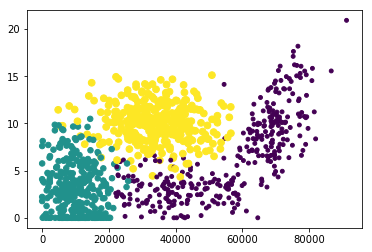

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:, 0], datingDataMat[:, 1], 15.0*array(datingLabels), 15.0*array(datingLabels))
# ax.scatter(datingDataMat[:, 0], datingDataMat[:, 2], 15.0*array(datingLabels), 15.0*array(datingLabels))
# ax.scatter(datingDataMat[:, 1], datingDataMat[:, 2], 15.0*array(datingLabels), 15.0*array(datingLabels))
plt.show()

上图中采用了矩阵的第一列和第二列属性得到的展示效果比较好，能够清晰地标识三个不同样本的分布区域。

**3.1 准备数据**：归一化数值

为了说明**归一化**是什么东西？我们先提取出如下的4组样本数据：

| 序号 | 玩视频游戏所耗时间百分比 | 每年获得的飞行常客里程数  | 每周消费的冰淇淋公升数  | 样本分类 |
| ------------- |:-------------:| -----:| -----:| -----:|
| 1 | 0.8 | 400     | 0.5 | 1 |
| 2 | 12  | 134 000 | 0.9 | 3 |
| 3 | 0   | 20 000  | 1.1 | 2 |
| 4 | 67  | 32 000  | 0.1 | 2 |


假设我们使用欧式距离计算样本3和样本四之间的距离，如下：

$\sqrt{(0 - 67)^2 + (20 000 - 32 000)^2 + (1.1 - 0.1)^2}$

可以看到，上述算式中差值最大的属性特征对计算结果影响最大，但是其他特征我们又不能抛弃不用，因此就有了**归一化**的操作。

**归一化**：就是让样本中各个特征的权重统一的过程。[Link](https://www.zhihu.com/question/19951858)

**归一化计算公式**：

$newValue = (oldValue - min) / (max - min)$

其中 *min* 和 *max* 分别是数据集中最小特征值和最大特征值。

**归一化的目的**：消除特征之间数据量级不同而导致的影响。

In [69]:
# 归一化函数
def autoNorm(dataSet):
    # 计算数据集中每种特征的最大值、最小值、范围
    maxVals = dataSet.max(0)
    minVals = dataSet.min(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    # 原始数据与最小值之差
    normDataSet = dataSet - tile(minVals, (m, 1))
    # 将最小值之差除以范围组成的矩阵
    normDataSet = normDataSet / tile(ranges, (m, 1))
    return normDataSet, ranges, minVals

In [70]:
# 调用autoNorm函数，查看结果
normMat, ranges, minVals = autoNorm(datingDataMat)
normMat, ranges, minVals

(array([[ 0.44832535,  0.39805139,  0.56233353],
        [ 0.15873259,  0.34195467,  0.98724416],
        [ 0.28542943,  0.06892523,  0.47449629],
        ..., 
        [ 0.29115949,  0.50910294,  0.51079493],
        [ 0.52711097,  0.43665451,  0.4290048 ],
        [ 0.47940793,  0.3768091 ,  0.78571804]]),
 array([  9.12730000e+04,   2.09193490e+01,   1.69436100e+00]),
 array([ 0.      ,  0.      ,  0.001156]))

~~**4. 训练算法**：此步骤不适用于kNN算法~~

因为测试数据每一次都要与全量的训练数据进行比较，所以这个过程是没有必要的。


**5. 测试算法**：使用花花提供的部分数据作为测试样本，测试分类器，如果预测分类和实际分类不同，则标记一个错误。

**测试分类器代码：**

In [73]:
# 测试分类器
def datingClassTest():
    # 设置测试数据的一个比例
    hoRatio = 0.1
    # 从文件中加载数据
    datingDataMat, datingLabels = file2matrix('resource/datingTestSet.txt')
    # 归一化数据
    normMat, ranges, minVals = autoNorm(datingDataMat)
    # m 表示数据的行数，即矩阵的第一维
    m = normMat.shape[0]
    # 设置测试样本的数量
    numTestVecs = int(m * hoRatio)
    print('numTestVecs=', numTestVecs)
    # 统计错误次数
    errorCount = 0.0
    # 遍历测试数据，进行分类
    for i in range(numTestVecs):
        # 分类
        classifier_result = classify0(normMat[i,:], normMat[numTestVecs:m,:], datingLabels[numTestVecs:m], 3)
        print("the classifier came back with: %d, the real answer is: %d" % (classifier_result, datingLabels[i]))
        # 统计错误
        if (classifier_result != datingLabels[i]):
            errorCount += 1

    print("the total error rate is: %f" % (errorCount / float(numTestVecs)))
    print(errorCount)
    
datingClassTest()

numTestVecs= 100
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 

可以看到，分类器处理数据集的错误率仅仅为 0.05%，是一个相当不错的结果，我们也可以不断地调整 hoRatio 的值，检测错误率是否会随着变量值的变化而变化。

**6. 使用算法**：构建完整的可用程序，使得花花可以输入一些特征数据以判断对方是否为自己喜欢的类型。

In [78]:
# 完整预测函数
def classifyPerson():
    resultList = ['not at all', 'in small doses','in large doses']
    percentTats = float(input('percentage of time spent playing video games?'))
    ffMils = float(input('frequent filer miles earned per year?'))
    iceCream = float(input('liters of ice cream consumed per year?'))
    datingDataMat, datingLabels = file2matrix('resource/datingTestSet.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = array([ffMils, percentTats, iceCream])
    classifierResult = classify0((inArr-minVals)/ranges,normMat,datingLabels, 3)
    print("You will probably like this person: ", resultList[classifierResult - 1])

In [80]:
# 最终运行效果
classifyPerson()

percentage of time spent playing video games?10
frequent filer miles earned per year?10000
liters of ice cream consumed per year?2.4
You will probably like this person:  in small doses



### 实践2： 手写数字识别

#### 项目概述

构造一个能识别数字 0  到 9 的基于kNN分类器的手写数字识别系统。

需要识别的数字存储在文本文件中，并且具有相同的色彩和带下：宽高 32 * 32 像素的黑白色图像。

#### 开发流程

1. 收集数据：提供了一些文本文件；
2. 准备数据：编写 img2vector()函数，将图像格式转换为分类器使用的向量格式；
3. 分析数据：在Python中检查数据，确保符合要求；
4. ~~训练算法：此步骤不适用于kNN算法；~~
5. 测试算法：编写函数，使用提供的部分数据作为测试样本集，测试样本与非测试样本的区别在于，测试样本是已经完成分类的数据，如果预测分类与实际类别不同，则标记一个错误；
6. 使用算法：本例没有完成此步骤。

**1. 收集数据**：提供文本文件

目录 [trainingDigits]() 中包含了大约 2000 个例子，每个例子内容如下图所示，每个数字大约有 200 个样本；目录 [testDigits]() 中包含了大约 900 个测试数据。